# Reproducing Balaban Exp1 CDA Study (2019)

## Notes

In [1]:
import numpy as np
import glob
import pickle
import pandas as pd

import mne
from mne import Epochs, pick_channels, find_events
from mne.io import read_raw_bdf

import sys
#sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/')
sys.path.append('D:\\PhD\\CDA-review\\studies\\')
from cda_utils import get_epochs, get_CDA, prep_report, fill_report, get_report, checksum, add_cda_report, get_CDA_perf_report
#sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/Balaban-2019/')
sys.path.append('D:\\PhD\\CDA-review\\studies\\Balaban-2019\\')
from events import get_specific_events
 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load, Prep & CDA

Processing: 528.bdf...
Extracting EDF parameters from /Users/nick/Documents/PhD/CDA Datasets/Balaban 2019/Data/Exp1_EEG/528.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1545471  =      0.000 ...  6036.996 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
['Fp1', 'AF3', 'F7', 'F3', 'P1', 'FCz', 'T7', 'C3', 'P5', 'PO7', 'P7', 'P3', 'POz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'PO8', 'P6', 'C4', 'T8', 'Fz', 'P2', 'F4', 'F8', 'AF4', 'Fp2', 'Cz', 'Pz', 'EXG7', 'EXG8', 'Status']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/745 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/745 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/745 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/745 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1


  0%|          | Repairing epochs : 0/745 [00:00<?,       ?it/s]

Dropped 218 epochs: 6, 9, 13, 14, 16, 19, 20, 21, 27, 32, 33, 37, 42, 44, 45, 47, 48, 52, 53, 55, 56, 61, 62, 63, 69, 73, 76, 81, 95, 102, 104, 108, 110, 111, 115, 117, 120, 123, 124, 130, 134, 136, 138, 143, 148, 153, 165, 166, 168, 169, 170, 173, 174, 176, 180, 184, 186, 188, 193, 195, 197, 198, 205, 211, 212, 213, 215, 217, 220, 221, 224, 233, 235, 242, 246, 247, 249, 252, 253, 257, 259, 262, 265, 266, 267, 268, 269, 271, 278, 282, 296, 299, 300, 302, 304, 306, 307, 310, 313, 323, 324, 328, 331, 333, 334, 336, 338, 340, 347, 349, 350, 352, 354, 357, 358, 359, 360, 361, 363, 367, 373, 383, 386, 391, 404, 408, 409, 412, 415, 418, 419, 424, 429, 430, 432, 434, 441, 442, 450, 452, 458, 473, 481, 495, 501, 505, 506, 507, 511, 512, 514, 516, 522, 523, 527, 530, 531, 534, 540, 543, 548, 550, 552, 558, 564, 565, 568, 569, 570, 574, 575, 586, 588, 589, 591, 592, 594, 600, 603, 604, 605, 610, 614, 615, 617, 621, 622, 623, 626, 629, 632, 638, 646, 652, 665, 679, 681, 683, 685, 693, 694, 699, 7

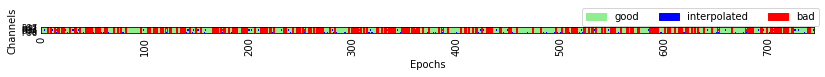

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[528.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: 0.8053541185511371
[528.bdf] Adding Mean CDA Amp f

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/766 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/766 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/766 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/766 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=4


  0%|          | Repairing epochs : 0/766 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


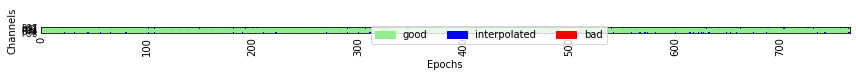

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[529.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: -3.9217306056617574
[529.bdf] Adding Mean CDA Amp 

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/770 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/770 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/770 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/770 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1


  0%|          | Repairing epochs : 0/770 [00:00<?,       ?it/s]

Dropped 115 epochs: 2, 10, 33, 40, 51, 53, 60, 63, 69, 74, 81, 98, 106, 110, 137, 156, 166, 171, 185, 191, 192, 195, 196, 205, 212, 217, 220, 223, 237, 240, 244, 256, 263, 281, 284, 286, 288, 311, 312, 314, 317, 320, 321, 322, 325, 329, 330, 333, 341, 345, 347, 353, 355, 356, 359, 360, 365, 380, 384, 389, 397, 401, 405, 409, 424, 447, 448, 463, 468, 472, 474, 476, 479, 503, 513, 520, 540, 541, 550, 566, 567, 577, 603, 604, 612, 618, 620, 629, 632, 646, 661, 663, 667, 672, 676, 678, 698, 705, 708, 709, 710, 722, 723, 724, 728, 729, 733, 735, 741, 742, 746, 747, 752, 763, 768


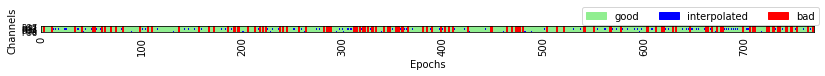

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[521.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: -3.5516769554276464
[521.bdf] Adding Mean CDA Amp 

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/756 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/756 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/756 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/756 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=1


  0%|          | Repairing epochs : 0/756 [00:00<?,       ?it/s]

Dropped 8 epochs: 246, 249, 512, 601, 606, 640, 699, 753


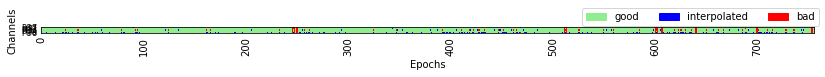

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[535.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: -3.354540938956707
[535.bdf] Adding Mean CDA Amp f

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/756 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/756 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/756 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/756 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=4


  0%|          | Repairing epochs : 0/756 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


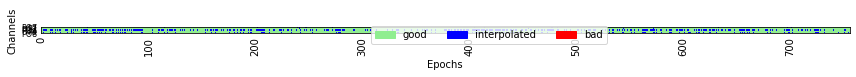

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[534.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: -1.5650729764472613
[534.bdf] Adding Mean CDA Amp 

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1


  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

Dropped 58 epochs: 23, 28, 63, 64, 65, 73, 79, 84, 86, 119, 137, 139, 143, 152, 182, 184, 201, 203, 205, 228, 240, 243, 244, 245, 264, 268, 269, 290, 333, 341, 365, 367, 369, 372, 373, 376, 380, 381, 425, 437, 441, 486, 502, 508, 529, 534, 548, 551, 573, 592, 609, 644, 691, 703, 716, 723, 731, 763


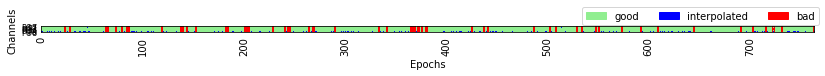

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[536.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: -2.3356676388743134
[536.bdf] Adding Mean CDA Amp 

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/748 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/748 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/748 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/748 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1


  0%|          | Repairing epochs : 0/748 [00:00<?,       ?it/s]

Dropped 102 epochs: 6, 8, 9, 10, 19, 20, 31, 33, 36, 39, 42, 47, 48, 53, 55, 58, 61, 66, 69, 70, 87, 90, 105, 120, 129, 138, 144, 147, 149, 162, 165, 177, 199, 202, 206, 208, 209, 211, 213, 215, 224, 225, 239, 240, 246, 249, 251, 261, 272, 273, 292, 294, 301, 305, 314, 319, 322, 325, 328, 335, 349, 355, 359, 364, 367, 395, 397, 404, 410, 416, 421, 427, 441, 442, 443, 458, 464, 467, 488, 503, 510, 513, 538, 544, 604, 610, 611, 614, 615, 620, 630, 643, 645, 647, 649, 661, 707, 729, 734, 736, 738, 740


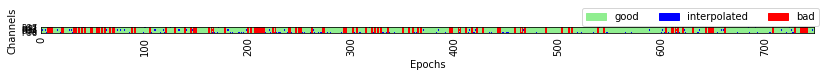

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[522.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: -0.5142214546236374
[522.bdf] Adding Mean CDA Amp 

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/749 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/749 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/749 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/749 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.90 and n_interpolate=1


  0%|          | Repairing epochs : 0/749 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


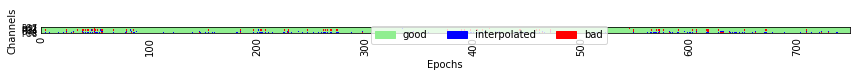

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[523.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: -4.346413492164285
[523.bdf] Adding Mean CDA Amp f

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/768 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/768 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/768 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/768 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=4


  0%|          | Repairing epochs : 0/768 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


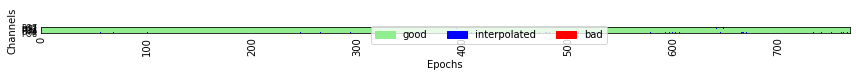

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[533.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: -5.389496456331244
[533.bdf] Adding Mean CDA Amp f

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/763 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/763 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/763 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/763 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=1


  0%|          | Repairing epochs : 0/763 [00:00<?,       ?it/s]

Dropped 12 epochs: 272, 407, 409, 418, 433, 445, 448, 451, 474, 559, 656, 749


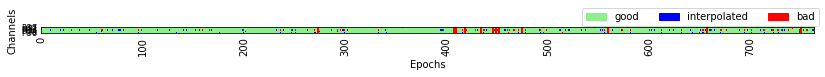

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[527.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: -3.033092063853144
[527.bdf] Adding Mean CDA Amp f

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/774 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/774 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/774 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/774 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=1


  0%|          | Repairing epochs : 0/774 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


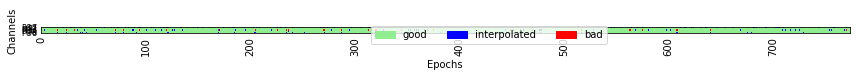

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[526.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: -2.8939594844698933
[526.bdf] Adding Mean CDA Amp 

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1


  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

Dropped 33 epochs: 4, 9, 20, 33, 40, 75, 93, 119, 142, 168, 177, 196, 199, 238, 263, 338, 358, 369, 420, 421, 430, 441, 446, 469, 493, 520, 546, 556, 579, 613, 619, 726, 732


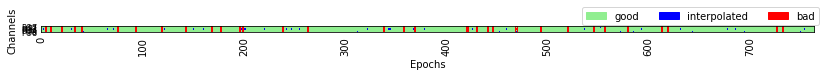

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[532.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: -4.9487776812470905
[532.bdf] Adding Mean CDA Amp 

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/755 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/755 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/755 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/755 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=4


  0%|          | Repairing epochs : 0/755 [00:00<?,       ?it/s]

Dropped 5 epochs: 270, 323, 438, 595, 648


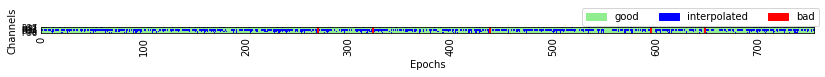

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[524.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: -1.2213920803421532
[524.bdf] Adding Mean CDA Amp 

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/762 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/762 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/762 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/762 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=4


  0%|          | Repairing epochs : 0/762 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


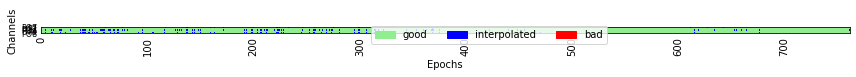

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[530.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: -4.135376045072161
[530.bdf] Adding Mean CDA Amp f

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/753 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/753 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/753 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/753 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1


  0%|          | Repairing epochs : 0/753 [00:00<?,       ?it/s]

Dropped 41 epochs: 25, 33, 34, 45, 229, 253, 254, 275, 288, 303, 331, 333, 334, 337, 351, 364, 370, 380, 390, 425, 436, 518, 528, 529, 552, 569, 592, 604, 618, 621, 641, 647, 651, 668, 679, 689, 709, 718, 728, 729, 740


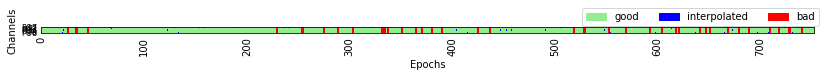

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[531.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: 0.4215623687871759
[531.bdf] Adding Mean CDA Amp f

/Users/nick/Documents/PhD/CLCT/reprod/studies/cda_utils.py:38: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/6 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/6 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/mne/bem.py:967: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=1


  0%|          | Repairing epochs : 0/764 [00:00<?,       ?it/s]

Dropped 77 epochs: 21, 24, 59, 65, 75, 76, 93, 121, 162, 182, 185, 186, 219, 264, 286, 298, 301, 312, 345, 347, 376, 384, 391, 405, 415, 418, 424, 439, 440, 445, 446, 458, 462, 476, 478, 489, 492, 513, 515, 519, 528, 536, 541, 544, 546, 557, 559, 560, 568, 578, 587, 594, 599, 615, 616, 627, 628, 631, 651, 652, 654, 659, 662, 663, 682, 689, 694, 695, 699, 707, 709, 716, 718, 728, 736, 742, 743


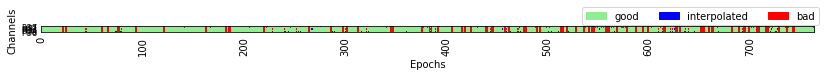

---------- Integrated_Shape-left-good -------------
---------- Integrated_Shape-left-bad -------------
---------- Integrated_Shape-right-good -------------
---------- Integrated_Shape-right-bad -------------
---------- Separation_Shape-left-good -------------
---------- Separation_Shape-left-bad -------------
---------- Separation_Shape-right-good -------------
---------- Separation_Shape-right-bad -------------
---------- Integrated_Color-left-good -------------
---------- Integrated_Color-left-bad -------------
---------- Integrated_Color-right-good -------------
---------- Integrated_Color-right-bad -------------
---------- Separation_Color-left-good -------------
---------- Separation_Color-left-bad -------------
---------- Separation_Color-right-good -------------
---------- Separation_Color-right-bad -------------
====================== /EPOCHING ======================
[525.bdf] Adding Mean CDA Amp for Integrated_Shape-left-good: -0.7333469996283175
[525.bdf] Adding Mean CDA Amp 

Integrated_Shape Separation_Shape Integrated_Color Separation_Color  \
528.bdf              201              174              178              192   
529.bdf              199              178              199              190   
521.bdf              185              204              205              176   
535.bdf              207              181              175              193   
534.bdf              197              177              177              205   
536.bdf              203              179              189              193   
522.bdf              173              203              184              188   
523.bdf              179              192              190              188   
533.bdf              195              200              185              188   
527.bdf              196              192              197              178   
526.bdf              197              186              213              178   
532.bdf              168              216              173              207   
524.bdf              197              174              178              206   
530.bdf              190              192              210              170   
531.bdf              183              188              177              205   
525.bdf              209              174              198              183   

        left right good  bad Integrated_Shape-left Integrated_Shape-left-CDA  \
528.bdf  358   387  629  116                    89                         0   
529.bdf  370   396  595  171                   105                         0   
521.bdf  390   380  626  144                    88                         0   
535.bdf  363   393  651  105                    97                         0   
534.bdf  378   378  601  155                    95                         0   
536.bdf  365   399  643  121                   100                         0   
522.bdf  383   365  633  115                    92                         0   
523.bdf  380   369  586  163                    89                         0   
533.bdf  384   384  602  166                   104                         0   
527.bdf  379   384  630  133                   102                         0   
526.bdf  374   400  578  196                    94                         0   
532.bdf  392   372  641  123                    88                         0   
524.bdf  395   360  622  133                   115                         0   
530.bdf  394   368  662  100                    97                         0   
531.bdf  409   344  598  155                    96                         0   
525.bdf  370   394  610  154                   100                         0   

         ... Separation_Color-right-good Separation_Color-right-good-CDA  \
528.bdf  ...                          72                       -3.979275   
529.bdf  ...                          85                       -2.329236   
521.bdf  ...                          63                        -0.90796   
535.bdf  ...                         100                       -0.861513   
534.bdf  ...                          72                       -2.132496   
536.bdf  ...                          86                       -0.151333   
522.bdf  ...                          77                       -1.016395   
523.bdf  ...                          85                       -1.597259   
533.bdf  ...                          78                       -1.015199   
527.bdf  ...                          85                        0.892218   
526.bdf  ...                          77                       -2.003725   
532.bdf  ...                          86                       -1.679004   
524.bdf  ...                          87                       -2.994075   
530.bdf  ...                          74                        -5.63185   
531.bdf  ...                          88                       -3.044584   
525.bdf  ...                          81                       -4.087251   

        ri

In [2]:
#==================================================================
# General Variables
#==================================================================
study_id = 'Balaban2019-Exp1'

triggers = dict();

triggers['Integrated_Shape'] = [21] 
triggers['Separation_Shape'] = [22]
triggers['Integrated_Color'] = [23]
triggers['Separation_Color'] = [24]

triggers['left'] =  [32]  #[31]
triggers['right'] = [31]  #[32]

triggers['good'] = [50,60]   # YR: Why 2 triggers for good and 2 triggers for bad?!
triggers['bad'] =  [5,6] 

# Labels
conds = ['Integrated_Shape', 'Separation_Shape', 'Integrated_Color', 'Separation_Color']
sides = ['left', 'right']
perfs = ['good', 'bad']

# Internal Triggers to Epochs Properly
internal_triggers = dict()
internal_triggers_count = 0
for cond in conds:
    for side in sides:
        for perf in perfs:
            internal_triggers_count = internal_triggers_count + 1
            internal_triggers['{}-{}-{}'.format(cond,side,perf)] = internal_triggers_count
            
# CDA Channels
chan_right = ['P8', 'PO8', 'PO4']
chan_left =  ['P7', 'PO7', 'PO3']

# Epoch Information
epoch_length = 2.2
epoch_tmin = -0.2
baseline_corr = (-0.2, 0)

# CDA info
cda_window = (0.8, 2.0)

# CDA main variable!
cda_dict_all = dict()
epochs_dict_all = dict()
perf_report_all = dict()
report = prep_report(conds, sides, perfs)

#==================================================================
# Main Loop - Loading All Files & Extract CDAs.
#==================================================================
folderpath = '/Users/nick/Documents/PhD/CDA Datasets/Balaban 2019/Data/Exp1_EEG/'
#folderpath = 'D:\\CLNT\\Data\\Open Datasets\\Balaban 2019\\Data\\Exp1_EEG\\'
#filepath = folderpath + '536.bdf'
sep = '/'

for filepath in glob.iglob(folderpath + '*.bdf'):
    filename = filepath[filepath.rfind(sep)+1:]
    print('Processing: ' + filename + '...')
   
    # ------------------------
    # 1. -- Load File --
    # ------------------------
    raw = read_raw_bdf(filepath, preload=True)

    # ------------------------
    # 2. -- Preprocessing --
    # ------------------------
    # Keep only EEG channels and reference
    #raw = raw.rename_channels({'EXG7':'A1', 'EXG8': 'A2'})
    raw = raw.drop_channels(ch_names=['EXG1','EXG2','EXG3','EXG4','EXG5','EXG6'])
    raw = raw.set_eeg_reference(ref_channels=['EXG7', 'EXG8'])
    raw = raw.set_channel_types({'EXG7': 'misc', 'EXG8': 'misc'})

    print(raw.info.ch_names)
    
    # Set Electrodes Locations
    # It's 32 channels, but it seems like they didn't use the "standard" Biosemi 32
    montage = mne.channels.make_standard_montage('biosemi64')
    raw.set_montage(montage)
    
    preproc = raw
    
    # Filter
    preproc = preproc.filter(.1, 20., fir_design='firwin', skip_by_annotation='edge')

    # Events
    events = find_events(preproc)
        
    # Select Channels (to save time on cleaning)
    preproc = preproc.pick_channels(chan_right + chan_left)
    
    # Plot (visual check)
    #preproc.plot(events=events, block=True, lowpass=40)
    
    # ------------------------
    # 3. -- Epochs --
    # ------------------------
    specific_events = get_specific_events(events, conds, sides, perfs, triggers, internal_triggers)

    epochs_dict = get_epochs(preproc, specific_events, epoch_length, epoch_tmin, baseline_corr, clean=True)

    epochs_dict_all[filename] = epochs_dict
    
    # times, used for CDA mean amp report.
    times = epochs_dict[conds[0]][sides[0]][perfs[0]].times
    
    # ------------------------
    # 4. -- CDA --
    # ------------------------
    cda_dict_all[filename] = get_CDA(epochs_dict, conds, sides, perfs, chan_right, chan_left)
    
    # ------------------------
    # 6. - Report & Checksum -
    # ------------------------
    report = fill_report(report, filename, specific_events)
    report = add_cda_report(report, filename, conds, sides, perfs, cda_dict_all[filename], times, cda_window=cda_window)
    report.at[filename, 'checksum'] = checksum(specific_events, epochs_dict)
    
    perf_report_all[filename] = get_CDA_perf_report(epochs_dict, conds, sides, perfs, chan_right, chan_left, cda_window=cda_window)

# Print report
print('{} Subjects & {} Trials'.format(len(report), 2*np.sum([report[cond].sum() for cond in conds])))
report

## 2. Plot Grand CDA Average

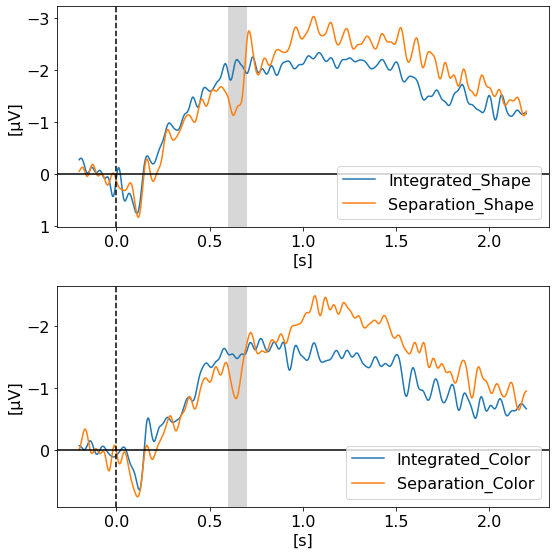

In [6]:
cda_all = dict()

# Get CDA GA
for cond in cda_dict_all[list(cda_dict_all.keys())[0]].keys():
    cda_all[cond] = dict()

    for f in cda_dict_all.keys():        
        perf = 'good'
        
        ldict = cda_dict_all[f][cond]['left']
        rdict = cda_dict_all[f][cond]['right']
        if (perf in ldict.keys() and len(ldict[perf])) and (perf in rdict.keys() and len(rdict[perf])):            
            cda_dict_cur = (cda_dict_all[f][cond]['left'][perf] + cda_dict_all[f][cond]['right'][perf])/2            
            cda_all[cond] = np.vstack([cda_all[cond], cda_dict_cur]) if len(cda_all[cond]) else cda_dict_cur
        else:
            print("==== SKIPPED: 0 points! (File: {} - Cond: {})".format(str(f), str(cond)))
            
# Plot
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(2, 1, figsize=(8,8))

axs[0].plot((times), cda_all['Integrated_Shape'].mean(0) * 1e6, label='Integrated_Shape')
axs[0].plot((times), cda_all['Separation_Shape'].mean(0) * 1e6, label='Separation_Shape')
axs[0].axvline(x=0, color='k', linestyle='--')
axs[0].axhline(y=0, color='k', linestyle='-')
axs[0].axvspan(0.6, 0.7, alpha=0.9, facecolor='lightgray')
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_ylabel('[μV]')
axs[0].set_xlabel('[s]')

axs[1].plot((times), cda_all['Integrated_Color'].mean(0) * 1e6, label='Integrated_Color')
axs[1].plot((times), cda_all['Separation_Color'].mean(0) * 1e6, label='Separation_Color')
axs[1].axvline(x=0, color='k', linestyle='--')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].axvspan(0.6, 0.7, alpha=0.9, facecolor='lightgray')
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_ylabel('[μV]')
axs[1].set_xlabel('[s]')

plt.tight_layout()
fig.savefig("./{}-reprod.png".format(study_id), dpi=300, format='png')

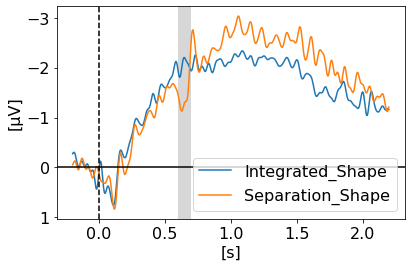

In [7]:
# Plot
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(6,4))

plt.plot((times), cda_all['Integrated_Shape'].mean(0) * 1e6, label='Integrated_Shape')
plt.plot((times), cda_all['Separation_Shape'].mean(0) * 1e6, label='Separation_Shape')
plt.axvline(x=0, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvspan(0.6, 0.7, alpha=0.9, facecolor='lightgray')
plt.gca().invert_yaxis()
plt.legend()
plt.ylabel('[μV]')
plt.xlabel('[s]')

plt.tight_layout()
fig.savefig("./{}-CDA1-reprod.png".format(study_id), dpi=300, format='png')

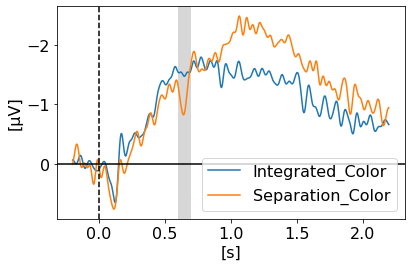

In [8]:
# Plot
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(6,4))

plt.plot((times), cda_all['Integrated_Color'].mean(0) * 1e6, label='Integrated_Color')
plt.plot((times), cda_all['Separation_Color'].mean(0) * 1e6, label='Separation_Color')
plt.axvline(x=0, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='-')
plt.axvspan(0.6, 0.7, alpha=0.9, facecolor='lightgray')
plt.gca().invert_yaxis()
plt.legend()
plt.ylabel('[μV]')
plt.xlabel('[s]')

plt.tight_layout()
fig.savefig("./{}-CDA2-reprod.png".format(study_id), dpi=300, format='png')

## Save CDA Data

In [4]:
data_pickle = dict()
data_pickle['times'] = times
data_pickle['CDA'] = cda_dict_all
data_pickle['epochs'] = epochs_dict_all
data_pickle['report'] = report
data_pickle['report_perf'] = perf_report_all

with open("{}_clean-20hz.pkl".format(study_id),"wb") as f:
    pickle.dump(data_pickle, f)

## Load CDA Data

In [4]:
with open("{}_clean-20hz.pkl".format(study_id),"rb") as f:
    data_pickle = pickle.load(f)
    
times = data_pickle['times']
cda_dict_all = data_pickle['CDA']
epochs_dict_all = data_pickle['epochs']
report = data_pickle['report']
perf_report_all = data_pickle['report_perf']

len(cda_dict_all)

16

## Analysis - Bad Perf Trials

Text(0.5, 0, '[s]')

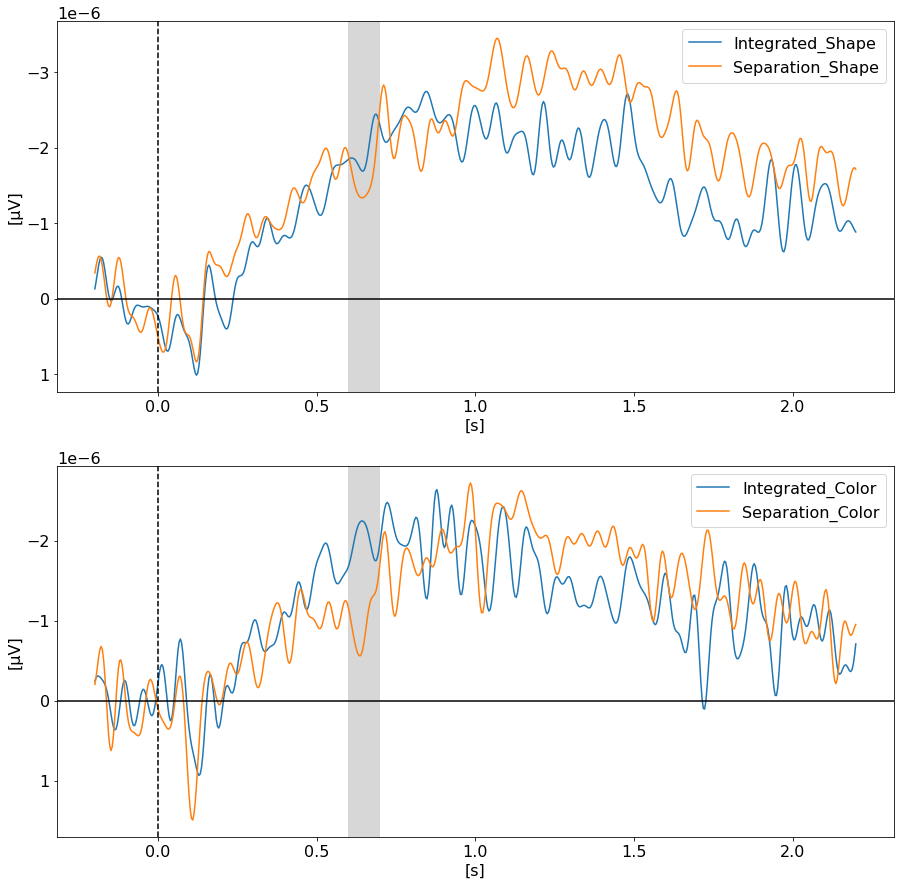

In [6]:
cda_all_bad = dict()

for cond in cda_dict_all[list(cda_dict_all.keys())[0]].keys():
    cda_all_bad[cond] = dict()

    for f in cda_dict_all.keys():
        perf = 'bad'
        
        ldict = cda_dict_all[f][cond]['left']
        rdict = cda_dict_all[f][cond]['right']
        if (perf in ldict.keys() and len(ldict[perf])) and (perf in rdict.keys() and len(rdict[perf])):            
            cda_dict_cur = (cda_dict_all[f][cond]['left'][perf] + cda_dict_all[f][cond]['right'][perf])/2
            if ~np.isnan(cda_dict_cur[0]):
                cda_all_bad[cond] = np.vstack([cda_all_bad[cond], cda_dict_cur]) if len(cda_all_bad[cond]) else cda_dict_cur
        elif (perf in ldict.keys() and len(ldict[perf])):
            cda_dict_cur = cda_dict_all[f][cond]['left'][perf]
            if ~np.isnan(cda_dict_cur[0]):
                cda_all_bad[cond] = np.vstack([cda_all_bad[cond], cda_dict_cur]) if len(cda_all_bad[cond]) else cda_dict_cur
        elif (perf in rdict.keys() and len(rdict[perf])):
            cda_dict_cur = cda_dict_all[f][cond]['right'][perf]
            if ~np.isnan(cda_dict_cur[0]):
                cda_all_bad[cond] = np.vstack([cda_all_bad[cond], cda_dict_cur]) if len(cda_all_bad[cond]) else cda_dict_cur            
        else:
            print("==== SKIPPED: 0 points! (File: {} - Cond: {})".format(str(f), str(cond)))

# Plot
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot((times), cda_all_bad['Integrated_Shape'].mean(0), label='Integrated_Shape')
axs[0].plot((times), cda_all_bad['Separation_Shape'].mean(0), label='Separation_Shape')
axs[0].axvline(x=0, color='k', linestyle='--')
axs[0].axhline(y=0, color='k', linestyle='-')
axs[0].axvspan(0.6, 0.7, alpha=0.9, facecolor='lightgray')
axs[0].invert_yaxis()
axs[0].legend()
axs[0].set_ylabel('[μV]')
axs[0].set_xlabel('[s]')

axs[1].plot((times), cda_all_bad['Integrated_Color'].mean(0), label='Integrated_Color')
axs[1].plot((times), cda_all_bad['Separation_Color'].mean(0), label='Separation_Color')
axs[1].axvline(x=0, color='k', linestyle='--')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].axvspan(0.6, 0.7, alpha=0.9, facecolor='lightgray')
axs[1].invert_yaxis()
axs[1].legend()
axs[1].set_ylabel('[μV]')
axs[1].set_xlabel('[s]')

#plt.savefig("./{}-bad.png".format(study_id), dpi=300, format='png')

## Analysis - Show Spread per subject

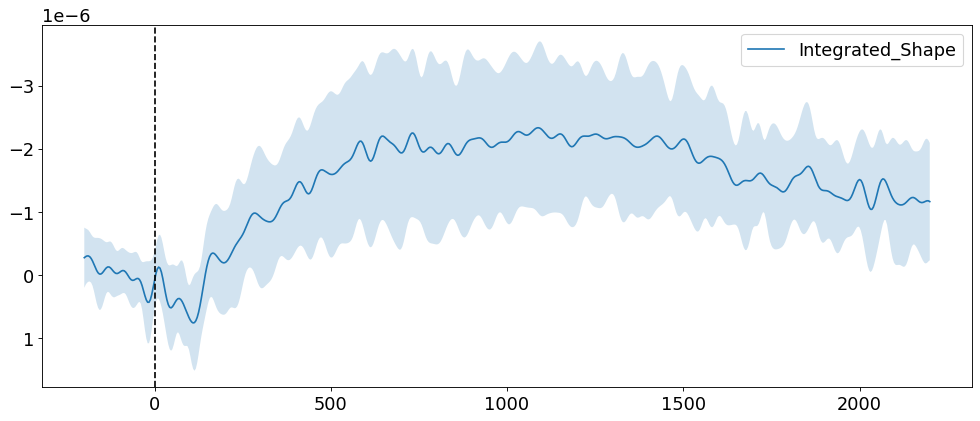

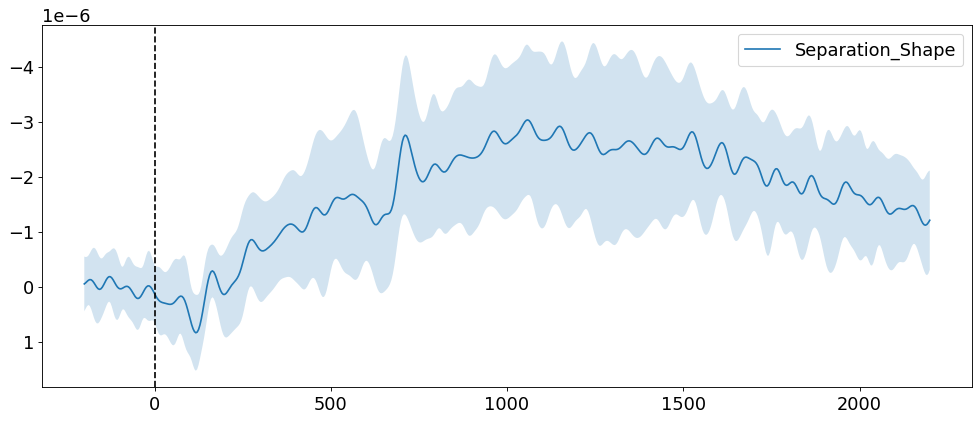

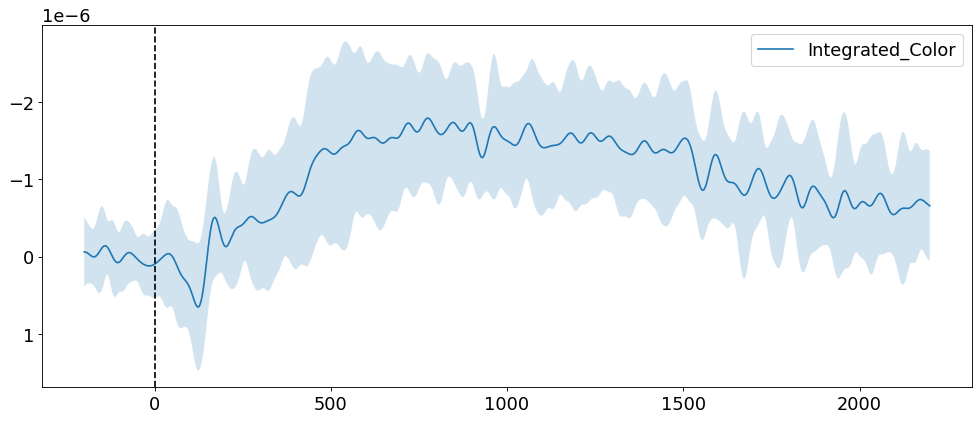

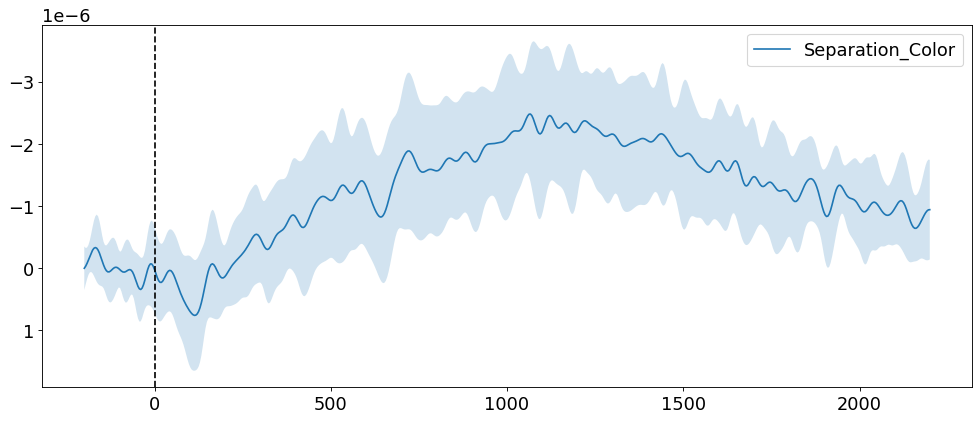

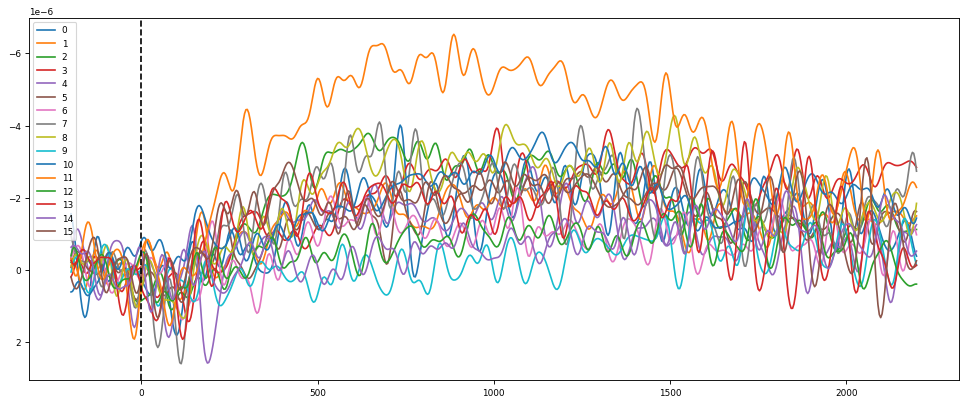

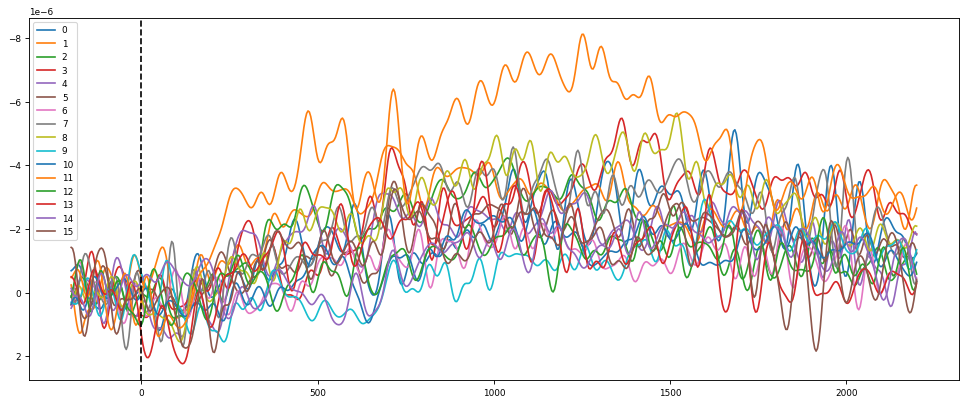

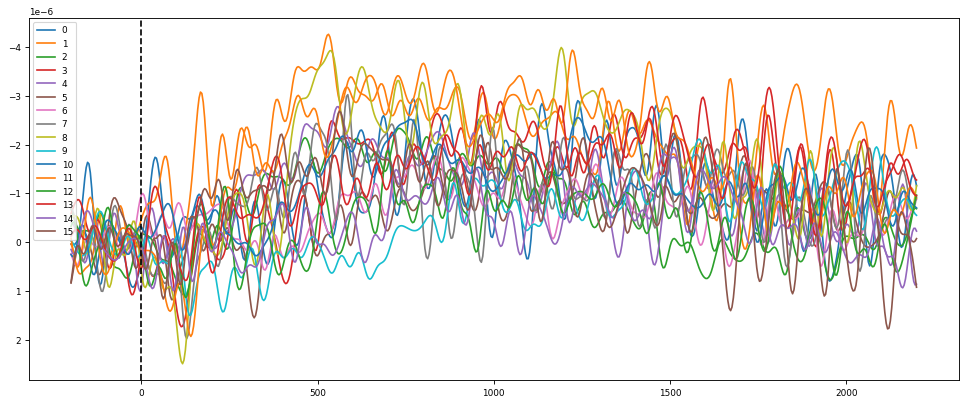

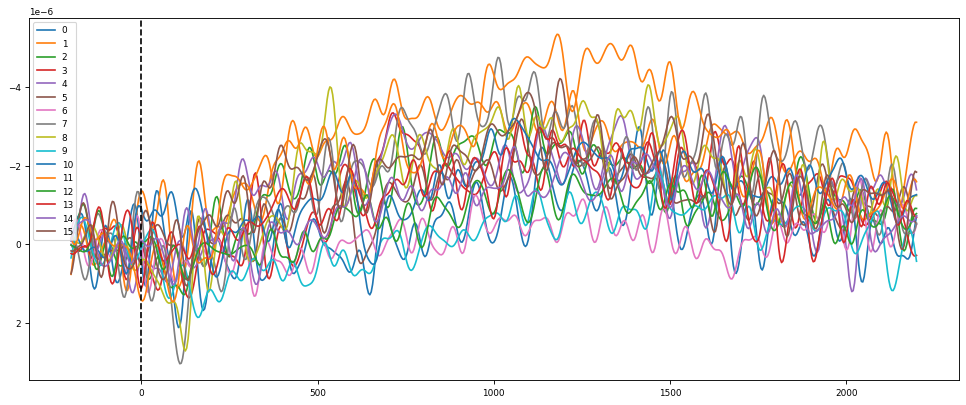

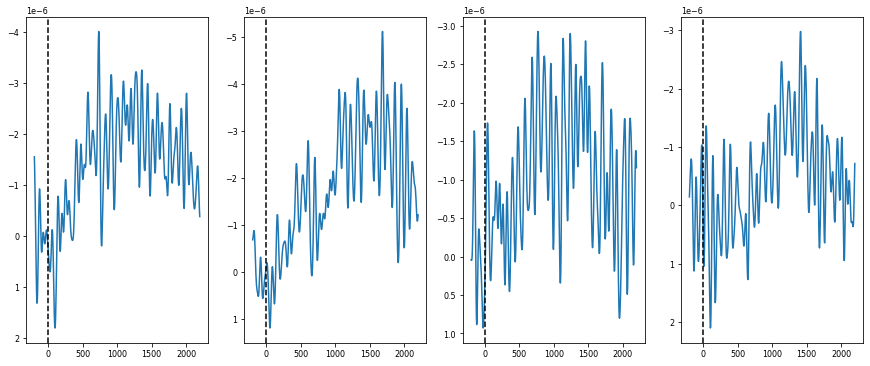

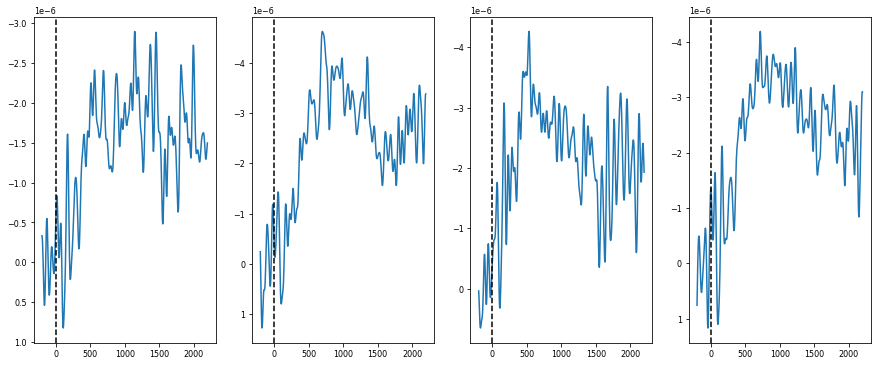

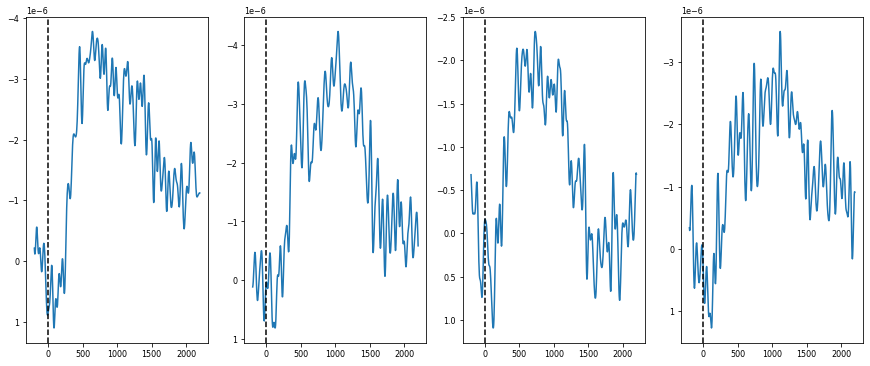

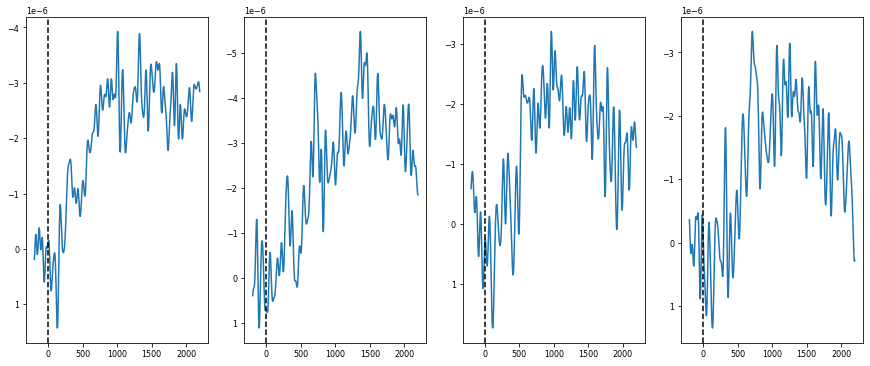

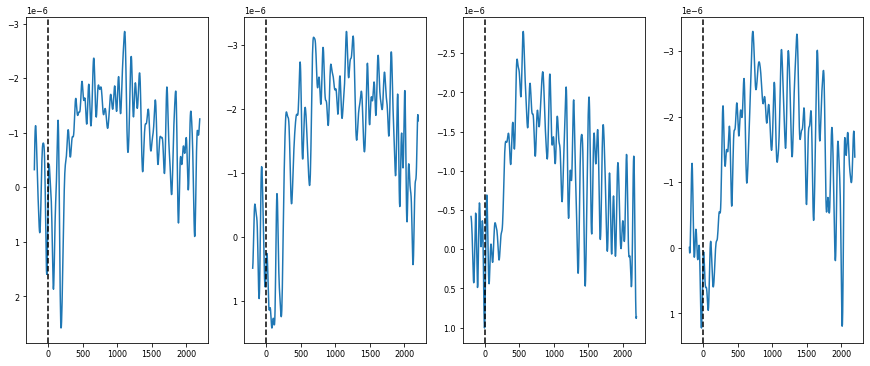

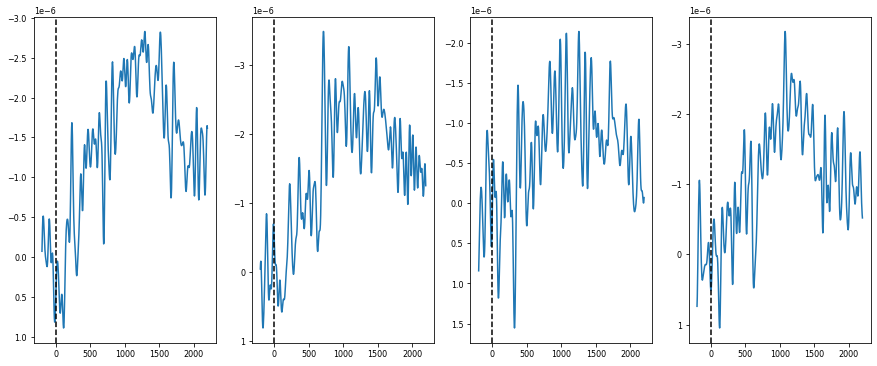

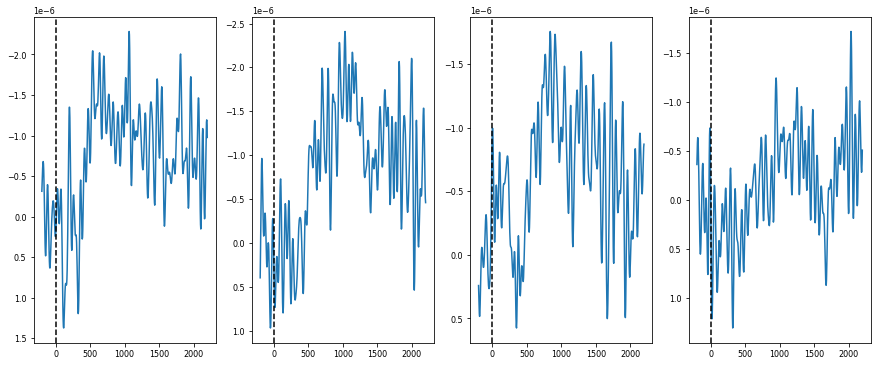

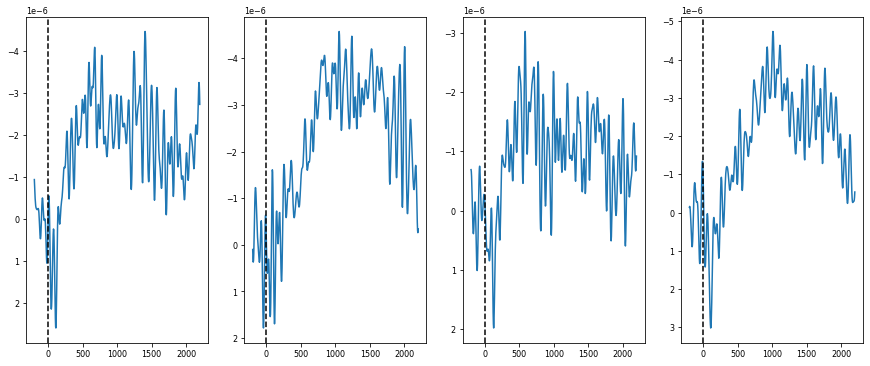

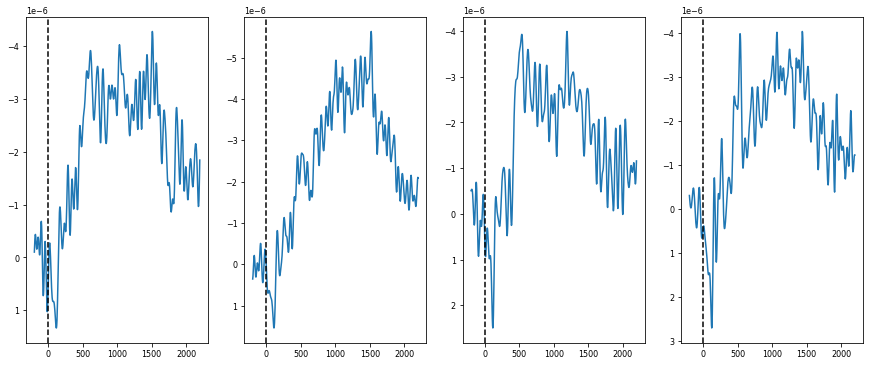

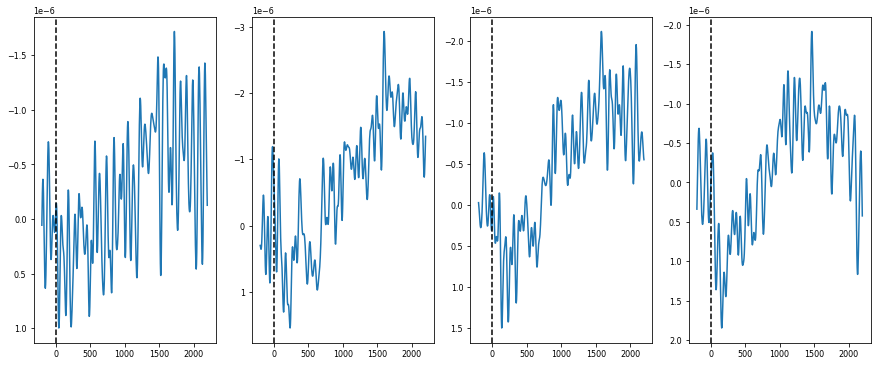

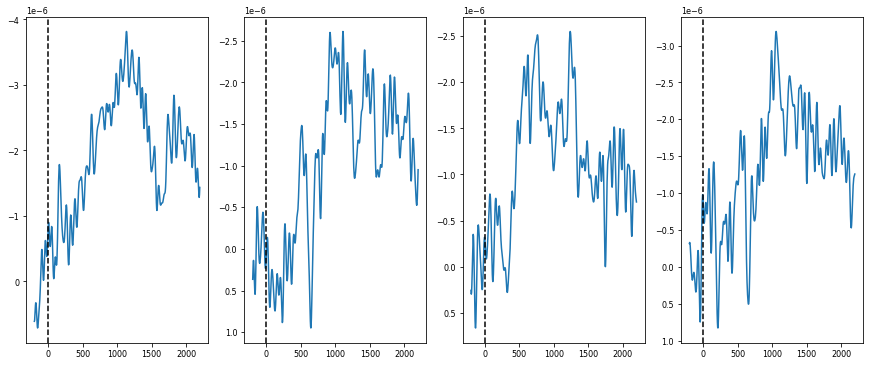

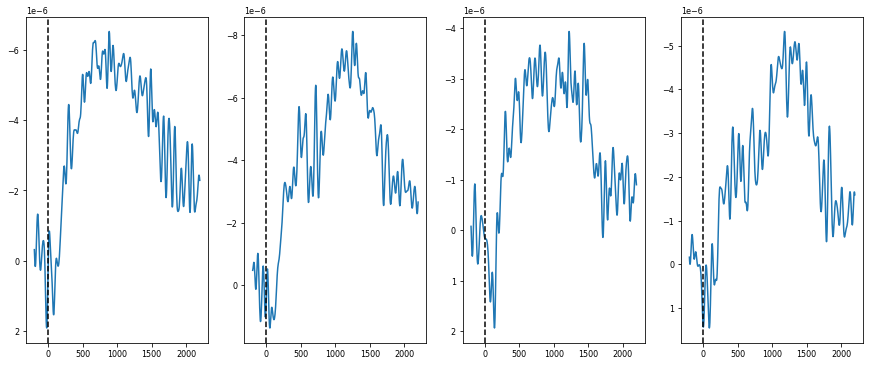

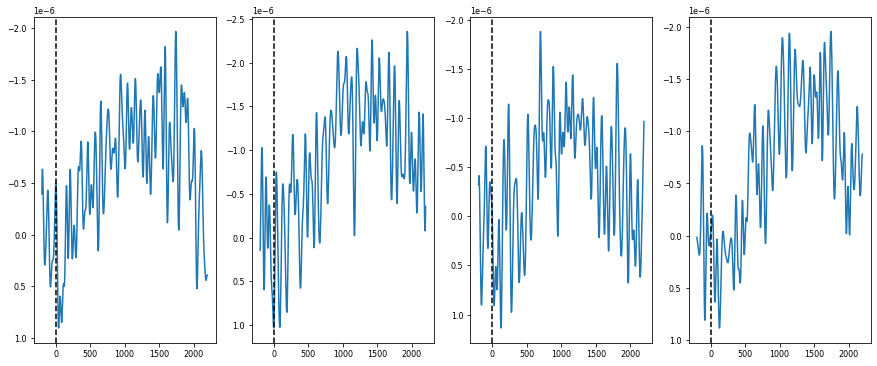

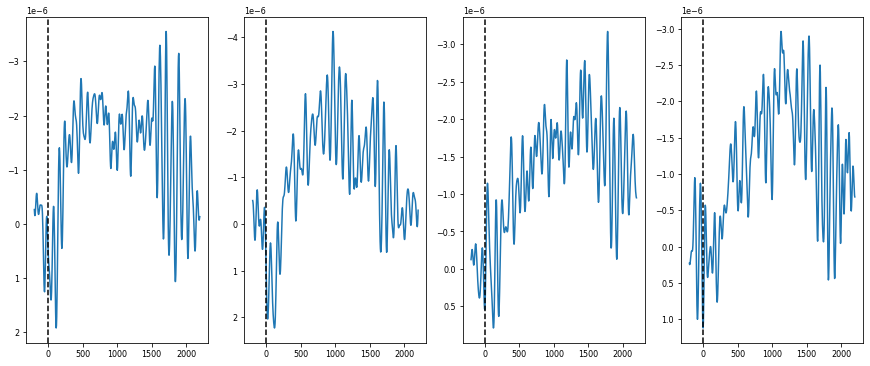

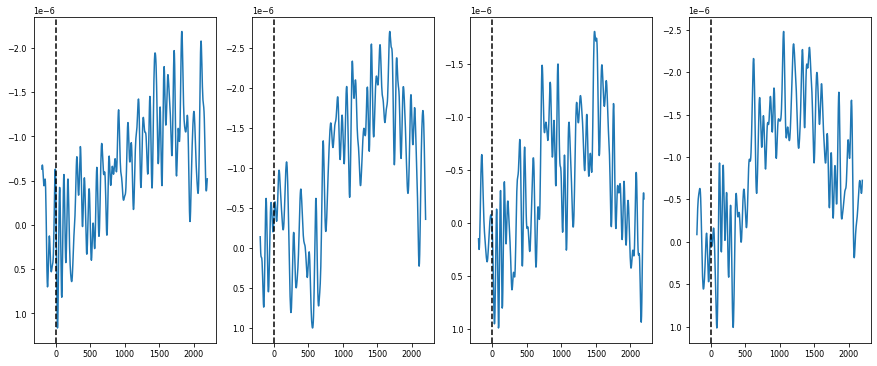

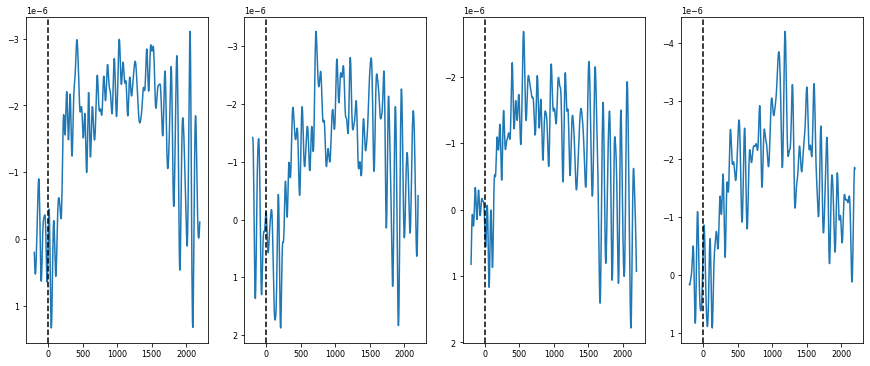

In [24]:
plt.rcParams.update({'font.size': 16})
for cond in conds:
    plt.figure(figsize=(15, 6), dpi=80)
    means = cda_all[cond].mean(0)
    stds = cda_all[cond].std(0)
    plt.plot((times * 1000), means, label=cond)
    plt.fill_between((times * 1000), means-stds,means+stds,alpha=.2)

    plt.axvline(x=0, color='k', linestyle='--')
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

plt.rcParams.update({'font.size': 8})
for cond in conds:
    plt.figure(figsize=(15, 6), dpi=80)
    for i in range(len(cda_all[cond])):
        plt.plot((times * 1000), cda_all[cond][i,:], label='{}'.format(i))

    plt.axvline(x=0, color='k', linestyle='--')
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()

plt.rcParams.update({'font.size': 8})
#plt.figure(figsize=(15, 6), dpi=80)
for subject in range(len(cda_all[conds[0]])):
    fig, axs = plt.subplots(1, len(conds), figsize=(15,6))
    for i, cond in enumerate(conds):
        axs[i].plot((times * 1000), cda_all[cond][subject,:], label='{}'.format(i))
        axs[i].axvline(x=0, color='k', linestyle='--')
        axs[i].invert_yaxis()
    
#plt.gca().invert_yaxis()
#plt.legend()
plt.show()

## Analysis - Performance Report (CDA per Subject)

In [8]:
report = report.loc[:,~report.columns.duplicated()]

## Subjects: Perf (Good/Bad) vs CDA Amp

Text(0, 0.5, 'Mean CDA Amplitude')

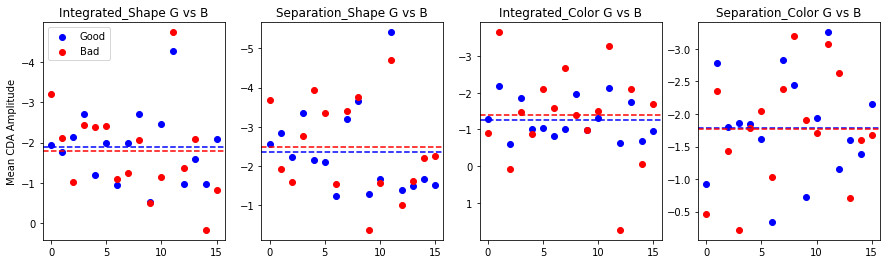

In [9]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, len(conds), figsize=(15,4))

for i, cond in enumerate(conds):
    x = range(len(report['{}-right-good-CDA'.format(cond)]))
    
    # Good
    y = (report['{}-right-good-CDA'.format(cond)] + report['{}-left-good-CDA'.format(cond)]) / 2
    axs[i].scatter(x=x, y=y, color='blue', label='Good')
    axs[i].axhline(y=np.nanmean(y), color='blue', linestyle='--')
    # Bad
    y = (report['{}-right-bad-CDA'.format(cond)] + report['{}-left-bad-CDA'.format(cond)]) / 2
    axs[i].scatter(x=x, y=y, color='red', label='Bad')
    axs[i].axhline(y=np.nanmean(y), color='red', linestyle='--')
    
    axs[i].set_title('{} G vs B'.format(cond))
    axs[i].invert_yaxis()
    
axs[0].legend()
axs[0].set_ylabel('Mean CDA Amplitude')
    

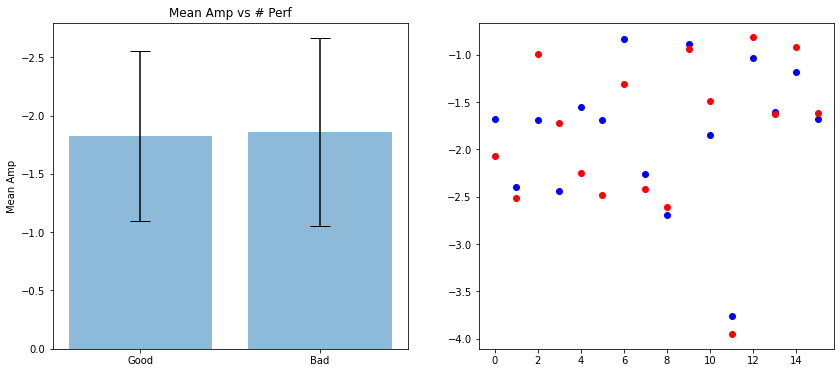

Corr Perf vs CDA Amp: (-0.01930759152833168, 0.9164675424456286)


In [10]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# Data
goods = np.array(report['good-CDA'])
bads = np.array(report['bad-CDA'])

# Calculate the average
goods_mean = np.nanmean(goods)
bads_mean = np.nanmean(bads)

# Calculate the standard deviation
goods_std = np.nanstd(goods)
bads_std = np.nanstd(bads)

# Define labels, positions, bar heights and error bar heights
labels = ['Good', 'Bad']
x_pos = np.arange(len(labels))
CTEs = [goods_mean, bads_mean]
error = [goods_std, bads_std]

# Build the plot
axs[0].bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
axs[0].set_ylabel('Mean Amp')
axs[0].set_xticks(x_pos)
axs[0].set_xticklabels(labels)
axs[0].set_title('Mean Amp vs # Perf')
axs[0].invert_yaxis()
#ax.yaxis.grid(True)

x = range(len(report['good-CDA']))
axs[1].scatter(x=x, y=report['good-CDA'], color='blue')
axs[1].scatter(x=x, y=report['bad-CDA'], color='red')

#plt.tight_layout()
plt.show()

import scipy
x = []
y = []
for p in perfs:
    for value in report['{}-CDA'.format(p)]:
        if p == 'good':
            x.append(1)
        else:
            x.append(2)
        y.append(value)

print('Corr Perf vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

## Subjects: Condition vs CDA Amp

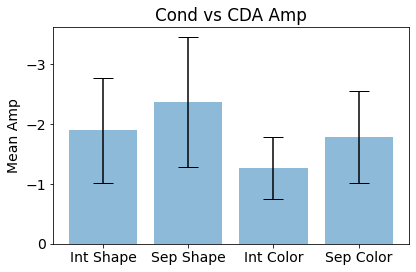

In [11]:
plt.rcParams.update({'font.size': 14})

data_conds = dict()
for cond in conds:
    data_conds[cond] = dict()
    data_conds[cond]['data'] = np.array(report['{}-good-CDA'.format(cond)])
    data_conds[cond]['mean'] = np.nanmean(data_conds[cond]['data'])
    data_conds[cond]['std'] = np.nanstd(data_conds[cond]['data'])
    
labels = ['Int Shape', 'Sep Shape', 'Int Color', 'Sep Color'] #conds
x_pos = np.arange(len(labels))
CTEs = [data_conds[cond]['mean'] for cond in conds]
error = [data_conds[cond]['std'] for cond in conds]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Mean Amp')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Cond vs CDA Amp')
ax.invert_yaxis()
#ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# Pearson's Correlation
import scipy
x = []
y = []
set_sizes = ['Separation_Shape','Integrated_Shape']
for i, ss in enumerate(set_sizes):
    for value in report['{}-good-CDA'.format(ss)]:
        x.append(i)
        y.append(value)

print('Corr Separation_Shape / Integrated_Shape vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

x = []
y = []
set_sizes = ['Separation_Color','Integrated_Color']
for i, ss in enumerate(set_sizes):
    for value in report['{}-good-CDA'.format(ss)]:
        x.append(i)
        y.append(value)

print('Corr Separation_Color / Integrated_Color vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

Corr Separation_Shape / Integrated_Shape vs CDA Amp: (0.2333213929006957, 0.1987302384243876)
Corr Separation_Color / Integrated_Color vs CDA Amp: (0.3717317107635405, 0.0361797103029783)


## Subjects: Side (Left/Right) vs CDA Amp

Corr Side vs CDA Amp: (0.06363091283150296, 0.7293571914247369)


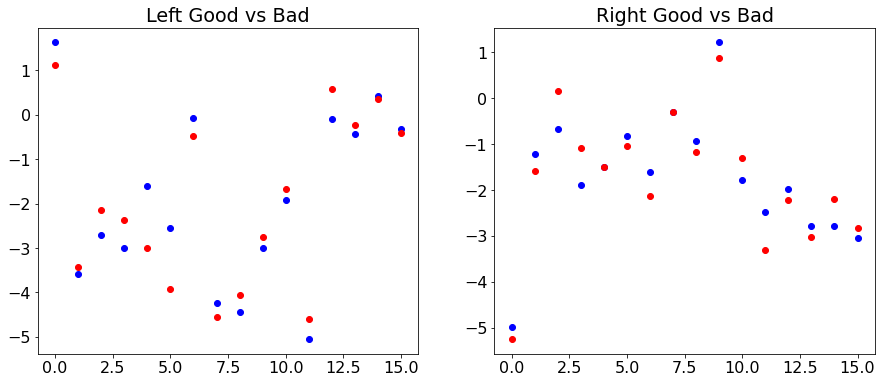

In [13]:
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(1, 2, figsize=(15,6))

x = range(len(report['left-good-CDA']))
axs[0].scatter(x=x, y=report['left-good-CDA'], color='blue')
x = range(len(report['left-bad-CDA']))
axs[0].scatter(x=x, y=report['left-bad-CDA'], color='red')
axs[0].set_title('Left Good vs Bad')

x = range(len(report['right-good-CDA']))
axs[1].scatter(x=x, y=report['right-good-CDA'], color='blue')
x = range(len(report['right-bad-CDA']))
axs[1].scatter(x=x, y=report['right-bad-CDA'], color='red')
axs[1].set_title('Right Good vs Bad')

x = []
y = []
for i, side in enumerate(sides):
    for value in report['{}-good-CDA'.format(side)]:
        x.append(i)
        y.append(value)

print('Corr Side vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

## Subjects: Accuracy / Performance vs CDA Amp

Corr Perf Acc ~ Integrated_Shape: (-0.13757321957866114, 0.6113962730732756)
Corr Perf Acc ~ Separation_Shape: (-0.24894994092843817, 0.3524857143650536)
Corr Perf Acc ~ Integrated_Color: (0.27248937165160075, 0.3072394755682318)
Corr Perf Acc ~ Separation_Color: (0.3449983922744651, 0.19064562258547513)


Text(0, 0.5, 'CDA Mean Amp')

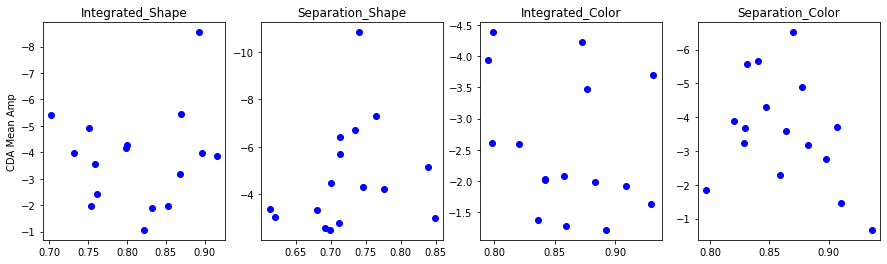

In [14]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, len(conds), figsize=(15,4))

for i, cond in enumerate(conds):
    goods = (report['{}-left-good'.format(cond)] + report['{}-right-good'.format(cond)])/2
    bads = (report['{}-left-bad'.format(cond)] + report['{}-right-bad'.format(cond)])/2
    x = goods / (goods + bads)
    y = report['{}-left-good-CDA'.format(cond)] + report['{}-right-good-CDA'.format(cond)]
    axs[i].scatter(x=x, y=y, color='blue')
    axs[i].invert_yaxis()
    axs[i].set_title('{}'.format(cond))
    
    print('Corr Perf Acc ~ {}: {}'.format(cond, scipy.stats.pearsonr(x,y)))

axs[0].set_ylabel('CDA Mean Amp')

## Trials: Conditions vs Amp

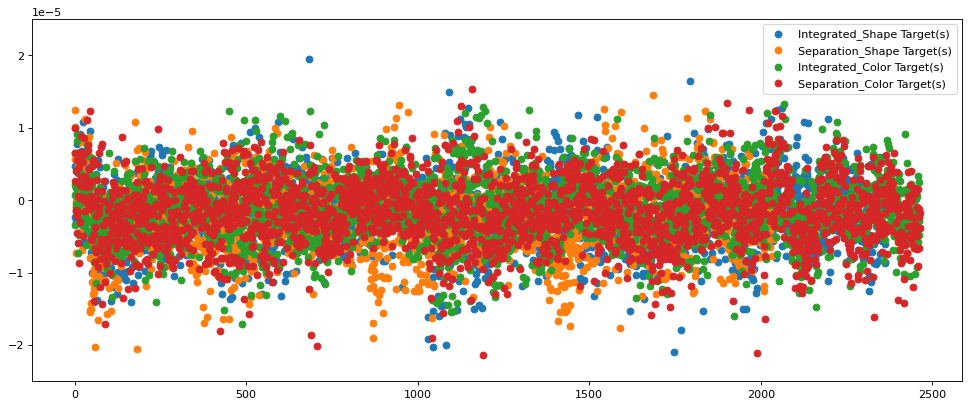

In [15]:
plt.figure(figsize=(15, 6), dpi=80)

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for side in sides:
            for value in perf_report_all[f][cond][side]['good']:
                y1.append(value)
    x1 = range(len(y1))

    plt.scatter(x=x1, y=y1, label='{} Target(s)'.format(cond))

plt.ylim(-2.5*1e-5,2.5*1e-5)
plt.legend()
plt.show()

## Trials: Good vs Bad

Cond = Integrated_Shape Targets: 2365 Good Perf Trials vs 561 Bad Perf Trials, with 2 outliers on graph.
Cond = Separation_Shape Targets: 2040 Good Perf Trials vs 779 Bad Perf Trials, with 0 outliers on graph.
Cond = Integrated_Color Targets: 2463 Good Perf Trials vs 414 Bad Perf Trials, with 1 outliers on graph.
Cond = Separation_Color Targets: 2465 Good Perf Trials vs 401 Bad Perf Trials, with 1 outliers on graph.


Text(0, 0.5, 'CDA mean amplitude')

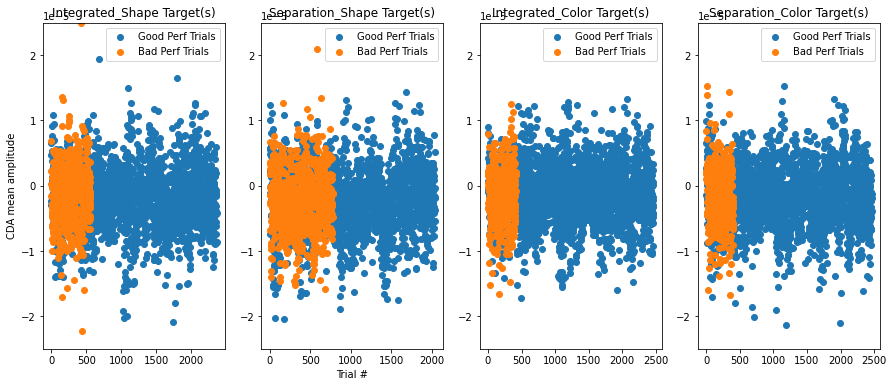

In [16]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, len(conds), figsize=(15,6))

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['left']['good']:
            y1.append(value)
        for value in perf_report_all[f][cond]['right']['good']:
            y1.append(value)
    x1 = range(len(y1))

    y2 = []
    for f in perf_report_all.keys():
        if 'bad' in perf_report_all[f][cond]['left'].keys():
            for value in perf_report_all[f][cond]['left']['bad']:
                y2.append(value)
        if 'bad' in perf_report_all[f][cond]['right'].keys():
            for value in perf_report_all[f][cond]['right']['bad']:
                y2.append(value)
    x2 = range(len(y2))

    axs[i].scatter(x=x1, y=y1, label='Good Perf Trials')
    axs[i].scatter(x=x2, y=y2, label='Bad Perf Trials')
    axs[i].legend()
    axs[i].set_ylim(-2.5*1e-5,2.5*1e-5)
    axs[i].set_title('{} Target(s)'.format(cond))

    nb_outliers = len([val for val in (y1 + y2) if ((val*1e5) > 2.5) or ((val*1e5) < -2.5)])
    print('Cond = {} Targets: {} Good Perf Trials vs {} Bad Perf Trials, with {} outliers on graph.'.format(cond, len(y1), len(y2), nb_outliers))

axs[1].set_xlabel('Trial #')
axs[0].set_ylabel('CDA mean amplitude')
#fig.tight_layout(pad=1.0)

## Trials: Left vs Right

Cond = Integrated_Shape Targets: 1166 Good Left Trials vs 1199 Good Right Trials, with 2 outliers on graph
Cond = Separation_Shape Targets: 1020 Good Left Trials vs 1020 Good Right Trials, with 0 outliers on graph
Cond = Integrated_Color Targets: 1209 Good Left Trials vs 1254 Good Right Trials, with 0 outliers on graph
Cond = Separation_Color Targets: 1243 Good Left Trials vs 1222 Good Right Trials, with 1 outliers on graph


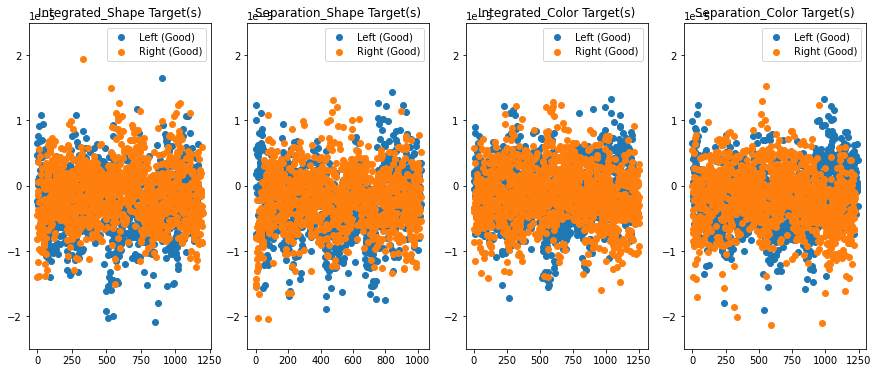

In [17]:
fig, axs = plt.subplots(1, len(conds), figsize=(15,6))

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['left']['good']:
            y1.append(value)
    x1 = range(len(y1))

    y2 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['right']['good']:
            y2.append(value)
    x2 = range(len(y2))

    axs[i].scatter(x=x1, y=y1, label='Left (Good)')
    axs[i].scatter(x=x2, y=y2, label='Right (Good)')
    axs[i].legend()
    axs[i].set_title('{} Target(s)'.format(cond))
    axs[i].set_ylim(-2.5*1e-5,2.5*1e-5)

    nb_outliers = len([val for val in (y1 + y2) if ((val*1e5) > 2.5) or ((val*1e5) < -2.5)])
    print('Cond = {} Targets: {} Good Left Trials vs {} Good Right Trials, with {} outliers on graph'.format(cond, len(y1), len(y2), nb_outliers))
        